In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
# Define the activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.square(x)

In [20]:
# Define the MLP class
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights
        self.weights_input_hidden = np.random.rand(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.rand(self.hidden_size, self.output_size)

        # Initialize biases
        self.bias_hidden = np.random.rand(self.hidden_size)
        self.bias_output = np.random.rand(self.output_size)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = tanh(self.hidden_input)  # Use tanh activation for hidden layer
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self.final_input  # Linear activation for output layer
        return self.final_output

    def backward(self, X, y, output, learning_rate):
        # Calculate the error
        output_error = y - output
        
        # Calculate the gradient for the output layer
        output_delta = output_error
        
        # Calculate the error for the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * tanh_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

# Function to generate target outputs based on a desired surface function
def target_function(x1, x2):
    return (np.sin(2 * np.pi * x1) * np.cos(2 * np.pi * x2)).reshape(-1, 1)


In [21]:
# Generate input data
num_samples = 200
x1 = np.random.rand(num_samples)  # Input variable 1
x2 = np.random.rand(num_samples)  # Input variable 2
X = np.column_stack((x1, x2))  # Combine inputs into a feature matrix
y = target_function(x1, x2)  # Calculate the corresponding target outputs


In [22]:
# Create the MLP
input_size = 2  # Two input variables
hidden_size = 10  # Number of neurons in the hidden layer
output_size = 1  # Single output

mlp = MultilayerPerceptron(input_size, hidden_size, output_size)


In [23]:
# Train the MLP
epochs = 20000
learning_rate = 0.001
mlp.train(X, y, epochs, learning_rate)

In [24]:
# Test the MLP
x1_test = np.linspace(0, 1, 50)
x2_test = np.linspace(0, 1, 50)
x1_test, x2_test = np.meshgrid(x1_test, x2_test)
X_test = np.column_stack((x1_test.ravel(), x2_test.ravel()))
predictions = mlp.forward(X_test).reshape(x1_test.shape)


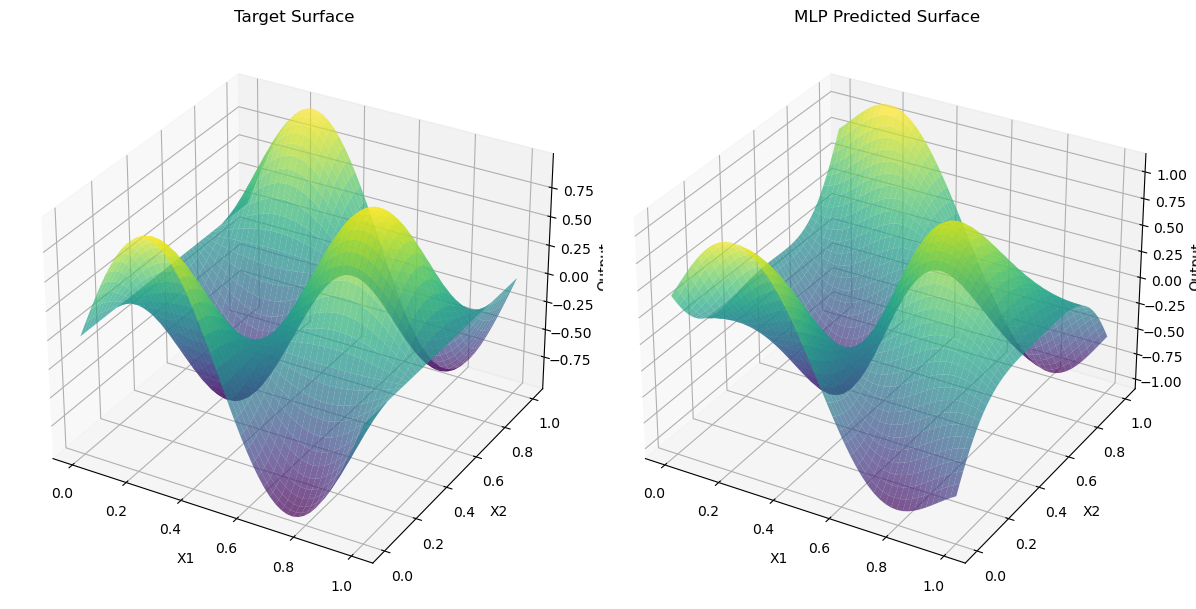

In [25]:
# Plotting the results
fig = plt.figure(figsize=(12, 6))

# Original target surface
ax1 = fig.add_subplot(121, projection='3d')
Z_target = target_function(x1_test.ravel(), x2_test.ravel()).reshape(x1_test.shape)
ax1.plot_surface(x1_test, x2_test, Z_target, cmap='viridis', alpha=0.7)
ax1.set_title('Target Surface')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Output')

# MLP predicted surface
ax2 = fig.add_subplot(122, projection='3d')
Z_predicted = mlp.forward(X_test).reshape(x1_test.shape)
ax2.plot_surface(x1_test, x2_test, Z_predicted, cmap='viridis', alpha=0.7)
ax2.set_title('MLP Predicted Surface')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Output')

plt.tight_layout()
plt.show()